In [64]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
#from sklearn.metrics import roc_curve
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
#from roc import plot_roc

In [5]:
df = pd.read_csv('data/churn.csv')

#Dealing with date-times
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

#Figuring out active customers
df['difference in date'] = df['last_trip_date'][49976] - df['last_trip_date']
df['difference in date'] = df['difference in date'] / np.timedelta64(1, 'D')
df['Active'] = df['difference in date'].apply(lambda x: True if x < 31 else False)

#Getting rid of the NaN's
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(4.6)
df['phone'] = df['phone'].fillna('Unknown')
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(4.78)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,difference in date,Active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,14.0,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,57.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,175.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,108.0,False


In [6]:
#drop the date fields
del df['last_trip_date']
del df['signup_date']
del df['phone']
del df['city']
del df['difference in date']

In [7]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Active
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,False


In [8]:
# 4. Make a numpy array called y containing the churn values
y = df.pop('Active').values

In [9]:
# 5. Make a 2 dimensional numpy array containing the feature data (everything except the labels)
X = df.values
# 6. Use sklearn's train_test_split to split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

array([[10.04, 5.0, 5.0, ..., 0, True, 0.0],
       [1.82, 5.0, 5.0, ..., 2, True, 0.0],
       [3.56, 5.0, 4.6, ..., 1, True, 100.0],
       ..., 
       [13.34, 5.0, 4.6, ..., 1, False, 50.0],
       [3.76, 4.5, 4.6, ..., 1, True, 50.0],
       [5.36, 5.0, 5.0, ..., 3, False, 62.5]], dtype=object)

In [10]:
# 7. Use sklearn's RandomForestClassifier to build a model of your data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
# 8. What is the accuracy score on the test data?
print "8. score:", rf.score(X_test, y_test)

8. score: 0.7064


In [12]:
# 9. Draw a confusion matrix for the results
y_predict = rf.predict(X_test)
print "confusion matrix:"
print confusion_matrix(y_test, y_predict)

confusion matrix:
[[6215 1657]
 [2013 2615]]


In [13]:
#What is the precision? Recall?
print "10. precision:", precision_score(y_test, y_predict)
print "    recall:", recall_score(y_test, y_predict)

10. precision: 0.612125468165
    recall: 0.565038893691


In [14]:
# Build the RandomForestClassifier again setting the out of bag parameter to be true
rf = RandomForestClassifier(n_estimators=30, oob_score=True)
rf.fit(X_train, y_train)
print "11: accuracy score:", rf.score(X_test, y_test)
print "    out of bag score:", rf.oob_score_

11: accuracy score: 0.71232
    out of bag score: 0.704613333333


In [58]:
#Use sklearn's model to get the feature importances
feature_importances = np.argsort(rf.feature_importances_)[::-1]
print feature_importances
# print "top five:", list(df.columns[feature_importances[-1:-6:-1]])
print 'sorted columns by highest importance to lowest :', df.columns[feature_importances].values
print 'df columns ', df.columns
print rf.feature_importances_

[4 1 7 6 3 5 0 2]
sorted columns by highest importance to lowest : ['surge_pct' 'avg_rating_by_driver' 'weekday_pct' 'luxury_car_user'
 'avg_surge' 'trips_in_first_30_days' 'avg_dist' 'avg_rating_of_driver']
df columns  Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'surge_pct', u'trips_in_first_30_days',
       u'luxury_car_user', u'weekday_pct'],
      dtype='object')
[ 0.03167468  0.18442439  0.01919666  0.09696303  0.30632206  0.09048449
  0.107283    0.1636517 ]


In [55]:
print 'artificial sort ', np.sort(rf.feature_importances_)[::-1]
print rf.feature_importances_
print 'indices ', np.argsort(rf.feature_importances_)[::-1]
print 'indices ', np.argsort(rf.feature_importances_)
# print df.columns
# list(df.columns[feature_importances[-1:-6:-1]])
# for f in range(len(df.columns)):
#     print f
#     print rf.feature_importances_[f]
    
#     print f + 1, df.columns[f], importances[indices[f]]

for i in [4, 1, 7, 6, 3, 5, 0, 2]:
    print df.columns[i]

artificial sort  [ 0.30632206  0.18442439  0.1636517   0.107283    0.09696303  0.09048449
  0.03167468  0.01919666]
[ 0.03167468  0.18442439  0.01919666  0.09696303  0.30632206  0.09048449
  0.107283    0.1636517 ]
indices  [4 1 7 6 3 5 0 2]
indices  [2 0 5 3 6 7 1 4]
surge_pct
avg_rating_by_driver
weekday_pct
luxury_car_user
avg_surge
trips_in_first_30_days
avg_dist
avg_rating_of_driver


Feature ranking:
0
1 avg_dist 0.306322059204
1
2 avg_rating_by_driver 0.184424388067
2
3 avg_rating_of_driver 0.163651696161
3
4 avg_surge 0.107282995944
4
5 surge_pct 0.0969630321342
5
6 trips_in_first_30_days 0.0904844905465
6
7 luxury_car_user 0.0316746774188
7
8 weekday_pct 0.0191966605253


(-1, 10)

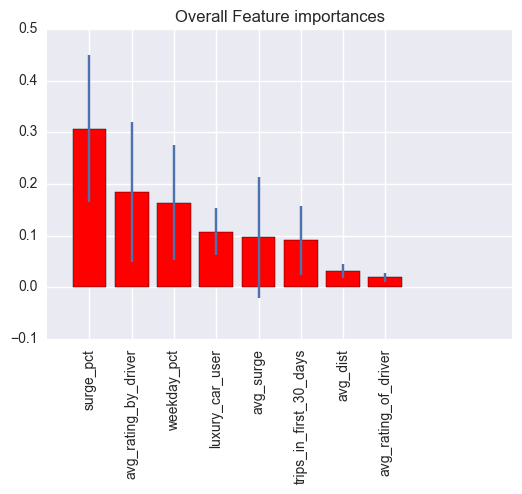

In [60]:
#Calculate the standard deviation for feature importances across all trees

n = len(df.columns)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# print 'features ', df.columns
# print 'importances', importances
# print 'indices', indices
# print 'std', std

# Print the feature ranking
print("Feature ranking:")

for f in range(n):
    print f
    print f + 1, df.columns[f], importances[indices[f]]

# Plot the feature importances of the forest
labels = df.columns[indices]
#plt.figure()
plt.title("Overall Feature importances")
plt.bar(range(n), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(n), labels, rotation='vertical') #indices)

plt.xlim([-1, 10])
#plt.show()

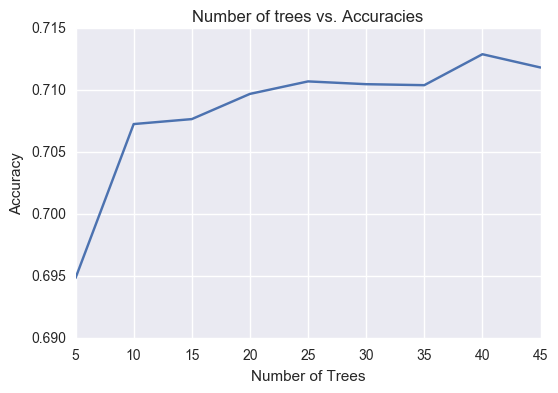

In [30]:
# Try modifying the number of trees
num_trees = range(5, 50, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(num_trees, accuracies)
plt.title("Number of trees vs. Accuracies")
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()

#NOTE: Accuracy gain levels off around 25

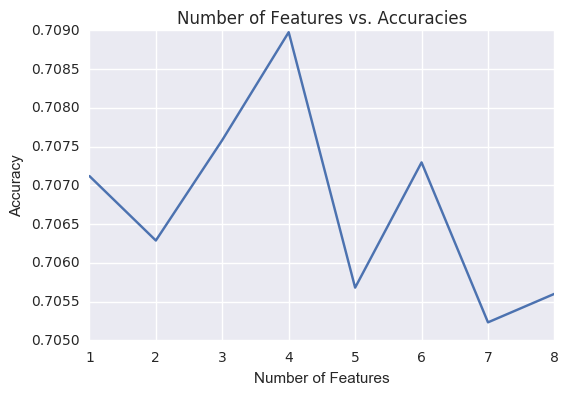

In [39]:
# Try modifying the max features parameter
num_features = range(1, len(df.columns) + 1)
accuracies = []
for n in num_features:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(max_features=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(num_features, accuracies)
plt.title("Number of Features vs. Accuracies")
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()

#NOTE: maximum at 4 features

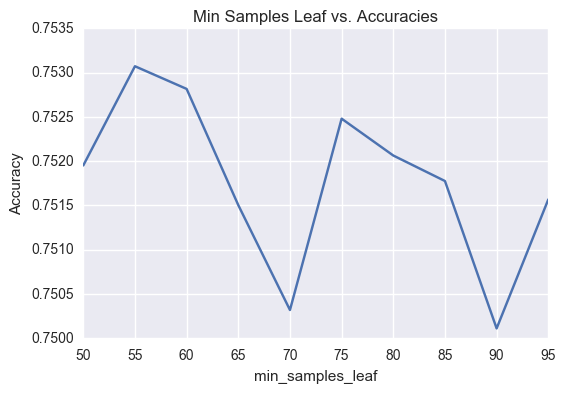

In [38]:
# Try modifying the min_samples_leaf parameter
min_leaf = range(50, 100, 5)
accuracies = []
for n in min_leaf:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(min_samples_leaf=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(min_leaf, accuracies)
plt.title("Min Samples Leaf vs. Accuracies")
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

In [41]:
# Run other classifiers and compare models
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print "Model:                    Accuracy,         Precision,        Recall"
print "1) Random Forest:      ", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=40, max_features=4, min_samples_leaf = 55)
print "2) Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test)
print "3) Decision Tree:      ", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test)
print "4) SVM:                ", get_scores(SVC, X_train, X_test, y_train, y_test)
print "5) Naive Bayes:        ", get_scores(MultinomialNB, X_train, X_test, y_train, y_test)

Model:                    Accuracy,         Precision,        Recall
1) Random Forest:       (0.75544, 0.70600576973511675, 0.58167675021607601)
2) Logistic Regression: (0.67976000000000003, 0.64315162620247368, 0.30337078651685395)
3) Decision Tree:       (0.6744, 0.5611038107752957, 0.55358686257562661)
4) SVM:                 (0.74807999999999997, 0.69303054032889588, 0.57368193604148665)
5) Naive Bayes:         (0.62704000000000004, 0.49573078854846808, 0.42653414001728607)


In [67]:
gdbr = GradientBoostingClassifier(n_estimators=55, random_state=1)
gdbr.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=55,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

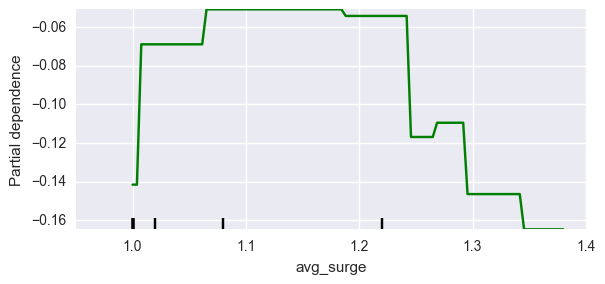

In [75]:

fig, axs = plot_partial_dependence(gdbr, X_train, [3],df.columns)


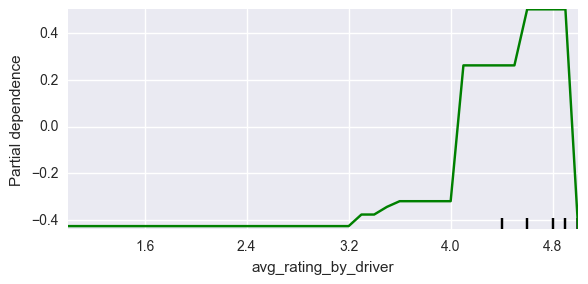

In [77]:
fig, axs = plot_partial_dependence(gdbr, X_train, [1],df.columns)

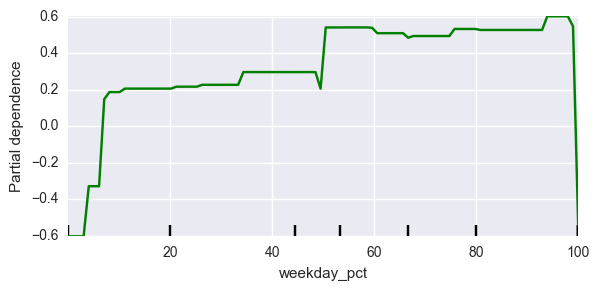

In [79]:
fig, axs = plot_partial_dependence(gdbr, X_train, [7],df.columns)

In [78]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'surge_pct', u'trips_in_first_30_days',
       u'luxury_car_user', u'weekday_pct'],
      dtype='object')

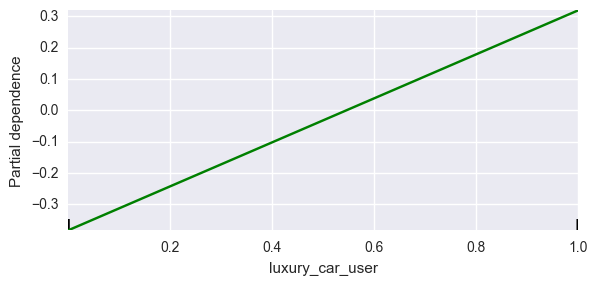

In [80]:
fig, axs = plot_partial_dependence(gdbr, X_train, [6],df.columns)